# Credit Card Fraud Classifier
In this project we have a Binary Classification Problem. We have to classify based on credit card transaction data whether that transaction was fraudulent or genuine. Since our data is labelled this is an example of a supervises leaning problem. Our target variable called "Class" is 1 in case of fraud and 0 otherwise. We first have to import the data, define the input for training and the output variable, then split the data for training and validation. Then we will make a deep neural network to be able to classify the data. Finally we test the accuracy of the network.

## Importing libraries used

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split #for splitting data
from tensorflow.python import keras 
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

## Importing the data file

I obtained the data from Kaggle, the link is https://www.kaggle.com/mlg-ulb/creditcardfraud. The data set is a CSV file which means the data are separated by commas.

In [22]:
data_file = "/kaggle/input/creditcardfraud/creditcard.csv"
data = pd.read_csv(data_file, delimiter=',')


* As we can see the file has 284807 rows and 31 columns

In [23]:
data.shape 

(284807, 31)

* The first 5 rows of the file is shown below

In [24]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Now we have to separate the data into the input measurements and the target variable
* The first 30 columns are the parameters
* The last column(31) is the target variable

## Preparing the data

In [28]:
def data_prep(data):
    
    out_y = data.values[:,-1] #just get the last coloumn since that contains the label of fraud/no fraud
    out_x = data.values[:,:-1] #selecting all coloumns except the last one 
    
    return out_x, out_y

x_data, y_data = data_prep(data)


* Splitting the data for training and validation
* A 70/30 split is done in this case

In [29]:
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size=0.30, random_state=1) #splitting the data for training and validation

## Defining the model

* Defining the neural network
* This network has one input layer of 30 nodes 4 hidden layers and an output layer consisting of one node specifying the fraud/non-fraud case

In [30]:
#defining the model
model = Sequential()

#adding layers
model.add(Dense(20, input_dim=30, activation='relu')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(15, activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model on our dataset 

history = model.fit(train_x, train_y,epochs=6,validation_data=(val_x, val_y))

Train on 199364 samples, validate on 85443 samples
Epoch 1/6
199364/199364 [==============================] - 25s 127us/sample - loss: 1.4435 - accuracy: 0.9965 - val_loss: 0.2058 - val_accuracy: 0.9984
Epoch 2/6
199364/199364 [==============================] - 24s 121us/sample - loss: 0.3425 - accuracy: 0.9976 - val_loss: 0.0843 - val_accuracy: 0.9985
Epoch 3/6
199364/199364 [==============================] - 25s 127us/sample - loss: 0.1001 - accuracy: 0.9976 - val_loss: 0.0219 - val_accuracy: 0.9984
Epoch 4/6
199364/199364 [==============================] - 24s 121us/sample - loss: 0.1241 - accuracy: 0.9978 - val_loss: 0.0695 - val_accuracy: 0.9984
Epoch 5/6
199364/199364 [==============================] - 25s 125us/sample - loss: 0.0175 - accuracy: 0.9982 - val_loss: 0.0132 - val_accuracy: 0.9984
Epoch 6/6
199364/199364 [==============================] - 26s 128us/sample - loss: 0.0286 - accuracy: 0.9981 - val_loss: 0.0118 - val_accuracy: 0.9984


All of the hidden layers are dense layers meaning that all nodes are connected to each output in the next layer. I have added 4 hidden layers so we get very accurate results. The activation function of these layers is a ReLU function which turns negative values into zeros (y=0)and leaves positive values as is(y=x). Note for the first layer we have to define the size of the input tensor which is 30 in this case since we have 30 input parameters, but for subsequent layers this is not necessary as it is automatically done for us. 

For the output layer there is only one node and the value of this node determines whether a transaction was a fraud/non-fraud transaction. If it is 1 then it's fraud and if it's 0 then it is non-fraud. The activation function used in this layer is a sigmoid function which returns a value between 0 and 1 specifying the type of the transaction. We use this function in the last layer because our problem is a binary classification problem and we need an output of either 0/1.

When we compile the model, what we are actually doing is we are updating the relationships between the dense layers. The loss function is set as binary cross-entropy due to the model being a binary classification model. The optimizer being used is adam, which is an enhanced stochastic gradient descent method. This optimizer is well suited for problems with large amounts of data and parameters as in this case. The metrics is set as accuracy and this just tells us the fraction of transactions that are being classified correctly and it doesn't actually affect the model's learning.

Fitting the model means making the model learn from our training data so that it finds a pattern and it updates the connections so that it will be able to correctly predict future values.



## Plotting accuracy

* Defining a function to graph the learning of our model

In [33]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

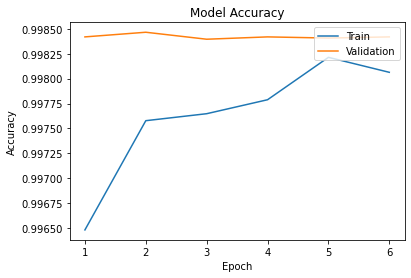

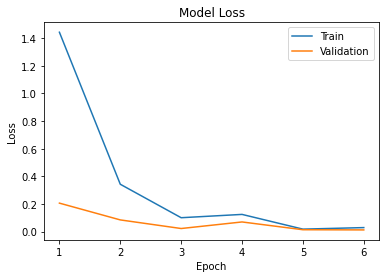

In [34]:
plotLearningCurve(history,6)

* As we can see from the graphs even after one epoch the model is very accurate and it qucikly improves to an accuracy of about 99.850 % after a few epochs. 